In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\Practice\\Kaggle\\spam.csv')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data Cleaning

In [6]:
df = df.rename(columns={'v1':'target','v2':'text'})

In [7]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df['target_num'] = df.target.map({'ham':0, 'spam':1})
df.head()

,target,text,target_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df

,target,text,target_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will �_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


# 0=ham 1=spam

In [10]:
df.duplicated().sum()

403

In [11]:
df =df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df['num_char'] = df['text'].apply(len)

<ipython-input-13-9dedb45ef33a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(len)


In [14]:
df['num_char'].max()

910

In [15]:
df[df.num_char == 910].text.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# EDA

In [16]:
import nltk
import string
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
from nltk.stem.porter import PorterStemmer

In [19]:
ps = PorterStemmer()
ps.stem('riding')

'ride'

In [20]:
text = 'hi how you doing'

In [21]:
nltk.word_tokenize(text)

['hi', 'how', 'you', 'doing']

In [22]:
type(text)

str

In [23]:
type(df['text'])

pandas.core.series.Series

In [24]:
def t(text):
    return text.lower()

In [25]:
df['text'] = df['text'].apply(t)

<ipython-input-25-6dff7b4f0f41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(t)


In [26]:

def text_transform(text):
    text = nltk.word_tokenize(text)
    y = []
    for char in text:
        if char not in string.punctuation and char not in stopwords.words('english'):
            y.append(char)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [27]:
from sklearn.preprocessing import FunctionTransformer

In [28]:
transformer = FunctionTransformer(text_transform)

In [29]:
df['transformed_text'] = df['text'].apply(text_transform)

<ipython-input-29-45f31dc32315>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(text_transform)


In [30]:
df

,target,text,target_num,num_char,transformed_text
0,ham,"go until jurong point, crazy.. available only ...",0,111,go jurong point crazi .. avail bugi n great wo...
1,ham,ok lar... joking wif u oni...,0,29,ok lar ... joke wif u oni ...
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say so early hor... u c already then say...,0,49,u dun say earli hor ... u c alreadi say ...
4,ham,"nah i don't think he goes to usf, he lives aro...",0,61,nah n't think goe usf live around though
...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,1,160,2nd time tri 2 contact u. u �750 pound prize 2...
5568,ham,will �_ b going to esplanade fr home?,0,37,�_ b go esplanad fr home
5569,ham,"pity, * was in mood for that. so...any other s...",0,57,piti mood ... suggest
5570,ham,the guy did some bitching but i acted like i'd...,0,125,guy bitch act like 'd interest buy someth els ...


In [31]:
#conda install -c conda-forge wordcloud

In [32]:
from wordcloud import WordCloud

In [33]:
wc = WordCloud(background_color='white')

In [34]:
spam_wc = wc.generate(df[df['target_num']==1]['transformed_text'].str.cat(sep=' '))

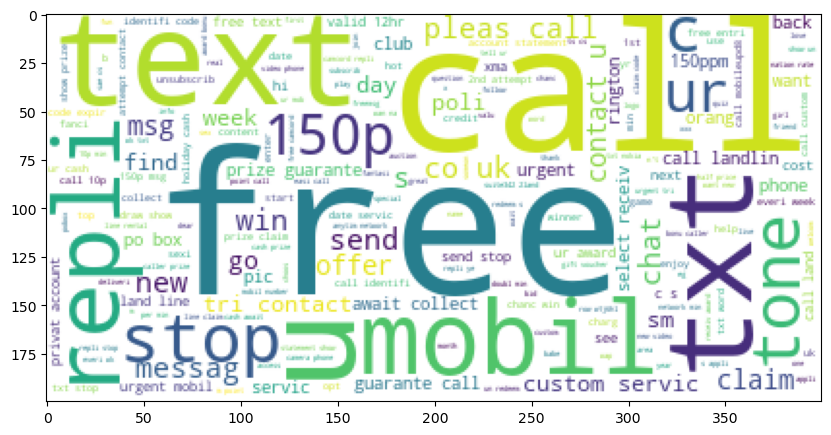

In [35]:
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(df[df['target_num']==0]['transformed_text'].str.cat(sep=' '))

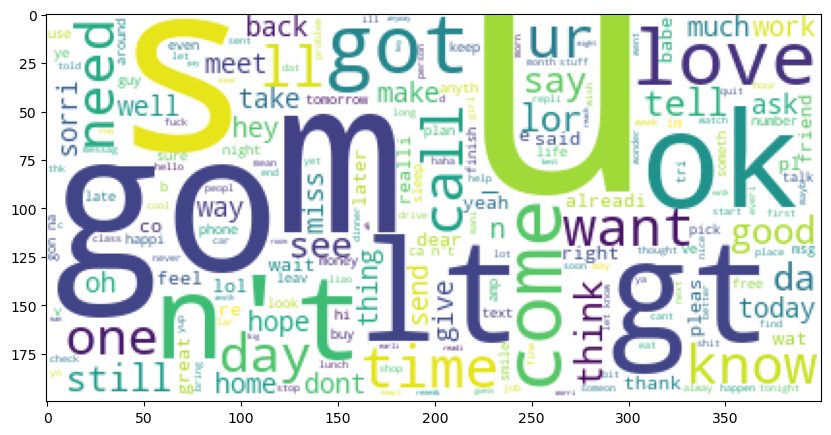

In [37]:
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(ham_wc)

# Model 

In [38]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [39]:
gb = GaussianNB()

In [40]:
mb = MultinomialNB(alpha=0.7)

In [41]:
bnb = BernoulliNB()

In [42]:
df.head()

,target,text,target_num,num_char,transformed_text
0,ham,"go until jurong point, crazy.. available only ...",0,111,go jurong point crazi .. avail bugi n great wo...
1,ham,ok lar... joking wif u oni...,0,29,ok lar ... joke wif u oni ...
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say so early hor... u c already then say...,0,49,u dun say earli hor ... u c alreadi say ...
4,ham,"nah i don't think he goes to usf, he lives aro...",0,61,nah n't think goe usf live around though


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tf = TfidfVectorizer(max_features=3000)

In [45]:
X = tf.fit_transform(df['transformed_text']).toarray()

In [46]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
X.shape

(5169, 3000)

In [48]:
y = df['target_num'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [51]:
from sklearn.metrics import accuracy_score,precision_score,classification_report,plot_confusion_matrix

0.9922630560928434 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       450
           1       1.00      0.94      0.97        67

    accuracy                           0.99       517
   macro avg       1.00      0.97      0.98       517
weighted avg       0.99      0.99      0.99       517



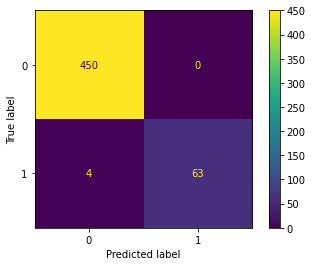

In [52]:
mb.fit(X_train,y_train)
pred = mb.predict(X_test)
print(accuracy_score(y_test,pred),precision_score(y_test,pred))
print(classification_report(y_test,pred))
plot_confusion_matrix(mb,X_test,y_test)

0.8626692456479691 0.4830508474576271
              precision    recall  f1-score   support

           0       0.97      0.86      0.92       450
           1       0.48      0.85      0.62        67

    accuracy                           0.86       517
   macro avg       0.73      0.86      0.77       517
weighted avg       0.91      0.86      0.88       517



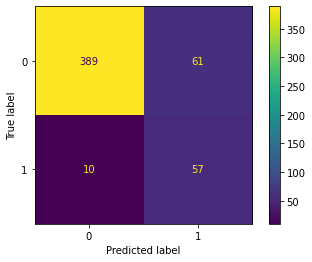

In [53]:
gb.fit(X_train,y_train)
pred2 = gb.predict(X_test)
print(accuracy_score(y_test,pred2),precision_score(y_test,pred2))
print(classification_report(y_test,pred2))
plot_confusion_matrix(gb,X_test,y_test)

0.9845261121856866 1.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       450
           1       1.00      0.88      0.94        67

    accuracy                           0.98       517
   macro avg       0.99      0.94      0.96       517
weighted avg       0.98      0.98      0.98       517



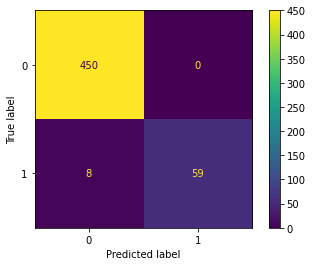

In [54]:
bnb.fit(X_train,y_train)
pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,pred3),precision_score(y_test,pred3))
print(classification_report(y_test,pred3))
plot_confusion_matrix(bnb,X_test,y_test)

In [56]:
import pickle

In [57]:
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mb,open('model.pkl','wb'))